# Importing Python Modules & Setting Up Jupyter Notebook Settings

In [1]:
# The usual data visualization modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# This is to increase the size of all figures
plt.rcParams["figure.dpi"] = 150

In [2]:
# Modules to create interactive plots

import chart_studio.plotly as py
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
# Other Python modules

import datetime as dt
import datetime
from datetime import datetime

from scipy import stats

In [4]:
# Used to execute multple lines of code in a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# # Used to display dataframes horizontally (instead of vertically)

# from IPython.display import display_html
# def display_side_by_side(*args):
#     html_str=''
#     for df in args:
#         html_str+=df.to_html()
#     display_html(html_str.replace('table','table style="display:inline"'),raw=True)

    
## ABOVE CODE IS NOT USED! Instead I used the solution here:
# https://stackoverflow.com/a/50899244
from IPython.display import display_html

# Importing Raw Data Files

In [6]:
# This is the first set of data that was collected

ffx = pd.read_csv("ffxLighting_original_june28.txt")

In [7]:
# This is the (larger) second set of data

ffx2 = pd.read_csv("ffxLighting_new_july1.txt")

**Initial Look At The Data**

In [8]:
ffx.head()
ffx2.head()

,count,timings
0,1,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237


,count,timings
0,1,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819


**General Info About Raw Data**

In [9]:
ffx.describe()
ffx2.describe()

,count
count,1135.000000
mean,568.000000
std,327.790584
min,1.000000
25%,284.500000
50%,568.000000
75%,851.500000
max,1135.000000


,count
count,1859.000000
mean,930.000000
std,536.791393
min,1.000000
25%,465.500000
50%,930.000000
75%,1394.500000
max,1859.000000


In [10]:
ffx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   count     1135 non-null   int64 
 1    timings  1135 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.9+ KB


In [11]:
ffx2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   count     1859 non-null   int64 
 1    timings  1859 non-null   object
dtypes: int64(1), object(1)
memory usage: 29.2+ KB


In [12]:
ffx.columns
ffx2.columns

Index(['count', ' timings'], dtype='object')

Index(['count', ' timings'], dtype='object')

**Looking At Specific Data Entries**

NOTES:
1. There is a leading space in the timings column (both in column header and the data values)!
2. The data in the 'timings' column are of type 'string'!

In [13]:
ffx["count"][0]
ffx[" timings"][0]

1

' 2020-06-28 16:40:11.538763'

In [14]:
type(ffx["count"][0])
type(ffx[" timings"][0])

numpy.int64

str

In [15]:
ffx2["count"][0]
ffx2[" timings"][0]

1

' 2020-07-01 22:18:22.806651'

In [16]:
type(ffx2["count"][0])
type(ffx2[" timings"][0])

numpy.int64

str

# **Data Cleaning**

### Part 1/2 - Original Data (ffx)

First, we shall get rid of the leading space in the 'timings' columns.

In [17]:
ffx.columns
ffx[" timings"][0]

Index(['count', ' timings'], dtype='object')

' 2020-06-28 16:40:11.538763'

In [18]:
# Eliminating leading space in the column header

ffx.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
ffx.columns

Index(['count', 'timings'], dtype='object')

In [19]:
# Eliminating leading space in the data values

ffx["timings"] = ffx["timings"].apply(lambda string: string[1:])
ffx["timings"][0]
type(ffx["timings"][0])

'2020-06-28 16:40:11.538763'

str

Next, we see if there are any null values. (I already know there aren't any, but we should still check to make sure.)

In [20]:
# Verifying that there are NO null values

ffx.count()
ffx.isnull().count()

count      1135
timings    1135
dtype: int64

count      1135
timings    1135
dtype: int64

Next, we convert the 'timings' data from string-type to Datetime-type.

In [21]:
# Converting 'timings' data to Datetime-type

ffx["Datetime"] = pd.to_datetime(ffx["timings"])

# Check to make sure it worked as expected
ffx.head()
ffx["Datetime"][0]
type(ffx["Datetime"][0])

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237


Timestamp('2020-06-28 16:40:11.538763')

pandas._libs.tslibs.timestamps.Timestamp

Next, I happen to know that some values at the *tail end* of the data are bad data (it was recorded while I was dismantling the data capture setup). We will find the bad data, and remove the respective rows.

NOTE: I also know that the data at the *front end* is okay, as I had correctly configured my data collection setup before I began to collect data.

In [22]:
# Initial check to see if we can find where the bad data starts

ffx[1100:]

,count,timings,Datetime
1100,1101,2020-06-28 19:17:45.300614,2020-06-28 19:17:45.300614
1101,1102,2020-06-28 19:17:51.295674,2020-06-28 19:17:51.295674
1102,1103,2020-06-28 19:18:02.442681,2020-06-28 19:18:02.442681
1103,1104,2020-06-28 19:18:08.487168,2020-06-28 19:18:08.487168
1104,1105,2020-06-28 19:18:19.587722,2020-06-28 19:18:19.587722
1105,1106,2020-06-28 19:18:25.632636,2020-06-28 19:18:25.632636
1106,1107,2020-06-28 19:18:36.770161,2020-06-28 19:18:36.770161
1107,1108,2020-06-28 19:18:42.812585,2020-06-28 19:18:42.812585
1108,1109,2020-06-28 19:18:53.944019,2020-06-28 19:18:53.944019
1109,1110,2020-06-28 19:18:59.994721,2020-06-28 19:18:59.994721


Based on our preliminary assessment, it's difficult to see which indices have the bad data. Since we are interested in investigating the time differences between lightning strikes, let's compute some quick preliminary time differences with the above data. This may give us some depth and allow us to find the bad data.

In [23]:
# Computing time differences
time_differences = [ (  f'{ffx["count"][i+1]}---{ffx["count"][i]}', 
                        ffx["Datetime"][i+1]-ffx["Datetime"][i]  ) for i in range(1100,1134) ]

# Converting above array into Pandas dataframe
bad_time_diff = pd.DataFrame(time_differences)

In [24]:
bad_time_diff

,0,1
0,1102---1101,00:00:05.995060
1,1103---1102,00:00:11.147007
2,1104---1103,00:00:06.044487
3,1105---1104,00:00:11.100554
4,1106---1105,00:00:06.044914
5,1107---1106,00:00:11.137525
6,1108---1107,00:00:06.042424
7,1109---1108,00:00:11.131434
8,1110---1109,00:00:06.050702
9,1111---1110,00:00:11.187673


We can see a very clear alternating pattern in the time difference data above. We see that thsi pattern breaks starting with index 17 (of this particular array!). This means that the data points with a count of **1119 and onward** are the bad data. *Recall: This was when I was dismantling the data collection setup*

So, in our ffx dataframe we can delete the rows with 'count' starting at 1119 and greater. *This translates to dataframe indices of **1118** and greater!*

In [25]:
ffx.shape

(1135, 3)

In [26]:
# Dropping the bad data from 'ffx' dataframe

drop_condition = ffx["count"] >= 1119

ffx_cleaned = ffx.drop(ffx[drop_condition].index, axis=0)

In [27]:
ffx_cleaned

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237
...,...,...,...
1113,1114,2020-06-28 19:19:34.304837,2020-06-28 19:19:34.304837
1114,1115,2020-06-28 19:19:45.509329,2020-06-28 19:19:45.509329
1115,1116,2020-06-28 19:19:51.529480,2020-06-28 19:19:51.529480
1116,1117,2020-06-28 19:20:02.690825,2020-06-28 19:20:02.690825


### Part 2/2 - Second Dataset (ffx2)

We now essentially repeat the above process 'ffx2' dataframe.

In [28]:
ffx2.columns
ffx2[" timings"][0]

Index(['count', ' timings'], dtype='object')

' 2020-07-01 22:18:22.806651'

In [29]:
# Eliminating leading space in the column header

ffx2.rename(mapper={" timings": "timings"}, axis=1, inplace=True)
ffx2.columns

Index(['count', 'timings'], dtype='object')

In [30]:
# Eliminating leading space in the data values

ffx2["timings"] = ffx2["timings"].apply(lambda string: string[1:])
ffx2["timings"][0]
type(ffx2["timings"][0])

'2020-07-01 22:18:22.806651'

str

In [31]:
# Looking for null values

ffx2.count()
ffx2.isnull().count()

count      1859
timings    1859
dtype: int64

count      1859
timings    1859
dtype: int64

Next, we convert the 'timings' column to Datetime-type

In [32]:
# Converting to Datetime objects

ffx2["Datetime"] = pd.to_datetime(ffx2["timings"])

# Verifying it worked correctly
ffx2.head()
ffx2["Datetime"][0]
type(ffx2["Datetime"][0])

,count,timings,Datetime
0,1,2020-07-01 22:18:22.806651,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819


Timestamp('2020-07-01 22:18:22.806651')

pandas._libs.tslibs.timestamps.Timestamp

Now, for this second data set, I happen to know that there is bad data at the *front end* of this data set. This is due to my starting the data collection process, but then fiddling with the setup.

NOTE: I know the data at the *tail end* of this data set is good data, as my data collection program had crashed right when it collected the last data value.

In [33]:
# Initial look to see if we can eye-ball the bad data (at the front end)

ffx2[:20]

,count,timings,Datetime
0,1,2020-07-01 22:18:22.806651,2020-07-01 22:18:22.806651
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136
6,7,2020-07-01 22:19:29.611230,2020-07-01 22:19:29.611230
7,8,2020-07-01 22:19:40.801496,2020-07-01 22:19:40.801496
8,9,2020-07-01 22:19:46.788705,2020-07-01 22:19:46.788705
9,10,2020-07-01 22:19:57.940598,2020-07-01 22:19:57.940598


As expected, we do see that the first few data points are bad data as they do not follow the pattern. So, as previously done, we shall compute the time differences to see how many rows of data we need to remove.

In [34]:
# Computing time differences (at head of data)

time_differences_2 = [(f'{ffx2["count"][i+1]}---{ffx2["count"][i]}', ffx2["Datetime"][i+1]-ffx2["Datetime"][i]) for i in range(10)]

# Converting to dataframe for ease of use
bad_time_diff2_head = pd.DataFrame(time_differences_2)

In [35]:
bad_time_diff2_head

,0,1
0,2---1,00:00:26.350671
1,3---2,00:00:06.040522
2,4---3,00:00:11.181126
3,5---4,00:00:06.039849
4,6---5,00:00:11.101317
5,7---6,00:00:06.091094
6,8---7,00:00:11.190266
7,9---8,00:00:05.987209
8,10---9,00:00:11.151893
9,11---10,00:00:06.000736


We see that the first time difference does not follow the observed pattern but the second time difference and beyond does. This means that only the first data point is the bad data. We will remove it.

In [36]:
# Removing (the single) bad data point at head of data set

ffx2_cleaned = ffx2.drop(labels=0, axis=0)
ffx2_cleaned

,count,timings,Datetime
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136
...,...,...,...
1854,1855,2020-07-02 02:43:49.553087,2020-07-02 02:43:49.553087
1855,1856,2020-07-02 02:44:00.693588,2020-07-02 02:44:00.693588
1856,1857,2020-07-02 02:44:06.734364,2020-07-02 02:44:06.734364
1857,1858,2020-07-02 02:44:17.871546,2020-07-02 02:44:17.871546


**Question: Should we combine these two dataframes?**

**Answer:** First and most obviously, we know these two dataframes (ffx_cleaned & ffx2_cleaned) hold the exact same type of information, namely the count and timing data of lightning strikes. We also know that our main goal of this data analysis is to investigate the time differences in lightning strikes. 

This being said, the decision we will make is to **not combine the dataframes**. Here are my reasons:

1. It does not make sense to combine them because the data was collected on during different time spans.

2. If we were to combine the dataframes, the point where the two dataframes join, there will be a large discrepency in the time difference (infact, as large as a few days!).

Ultimately, the easier path is to analyze the dataframes separately. This will also allow us to **compare the results of two independent data sets**, which is always a good thing to do!

# Feature Engineering

### Part 1/2 - Original Dataset Cleaned (ffx_cleaned)

Of course, the main feature we wish to create is a "time difference" feature.

In [37]:
ffx_cleaned.head()

,count,timings,Datetime
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237


In [38]:
# Creating the time difference feature

ffx_cleaned["deltaT"] = ffx_cleaned["Datetime"] - ffx_cleaned["Datetime"].shift(1)
ffx_cleaned.head()
type(ffx_cleaned["deltaT"][1])

,count,timings,Datetime,deltaT
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352


pandas._libs.tslibs.timedeltas.Timedelta

Something that may be useful is to extract only the seconds information of each time difference. We create this feature below.

In [39]:
# Just for reference

ffx_cleaned["deltaT"][3]
ffx_cleaned["deltaT"][3].seconds
ffx_cleaned["deltaT"][3].microseconds

Timedelta('0 days 00:00:05.974197')

5

974197

In [40]:
# Creating the timedelta feature, in units of "seconds"

ffx_cleaned["dT(seconds)"] = [ffx_cleaned["deltaT"][i].seconds + ffx_cleaned["deltaT"][i].microseconds * 10**(-6) for i in range(0,len(ffx_cleaned["deltaT"]))]

In [41]:
ffx_cleaned

,count,timings,Datetime,deltaT,dT(seconds)
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT,NaN
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774,6.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151,11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197,5.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352,11.248352
...,...,...,...,...,...
1113,1114,2020-06-28 19:19:34.304837,2020-06-28 19:19:34.304837,00:00:05.934609,5.934609
1114,1115,2020-06-28 19:19:45.509329,2020-06-28 19:19:45.509329,00:00:11.204492,11.204492
1115,1116,2020-06-28 19:19:51.529480,2020-06-28 19:19:51.529480,00:00:06.020151,6.020151
1116,1117,2020-06-28 19:20:02.690825,2020-06-28 19:20:02.690825,00:00:11.161345,11.161345


### Part 2/2 - Second Dataset Cleaned (ffx2_cleaned)

We create the same two features with the second data set (ffx2_cleaned)

In [42]:
ffx2_cleaned.head()

,count,timings,Datetime
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136


In [43]:
# Creating the time difference features (as Timedelta objects)
ffx2_cleaned["deltaT"] = ffx2_cleaned["Datetime"] - ffx2_cleaned["Datetime"].shift(1)


#Creating the time difference features (in units of "seconds")
ffx2_cleaned["dT(seconds)"] = [ffx2_cleaned["deltaT"][i].seconds + ffx2_cleaned["deltaT"][i].microseconds * 10**(-6) for i in range(1,len(ffx2_cleaned["deltaT"])+1)]

In [44]:
ffx2_cleaned

,count,timings,Datetime,deltaT,dT(seconds)
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322,NaT,NaN
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844,00:00:06.040522,6.040522
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970,00:00:11.181126,11.181126
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819,00:00:06.039849,6.039849
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136,00:00:11.101317,11.101317
...,...,...,...,...,...
1854,1855,2020-07-02 02:43:49.553087,2020-07-02 02:43:49.553087,00:00:06.050874,6.050874
1855,1856,2020-07-02 02:44:00.693588,2020-07-02 02:44:00.693588,00:00:11.140501,11.140501
1856,1857,2020-07-02 02:44:06.734364,2020-07-02 02:44:06.734364,00:00:06.040776,6.040776
1857,1858,2020-07-02 02:44:17.871546,2020-07-02 02:44:17.871546,00:00:11.137182,11.137182


# **Exploratory Data Analysis**

Now that we have cleaned our datasets and created the main features of investigation, we move on to our EDA to see what patterns and information we can uncover.

Just as we had observed in the data cleaning section, we again immediately see that there seems to be a periodic pattern to the time difference feature. To start investigating this, let's extract some basic information about the time difference feature.

**Basic Information**

In [45]:
ffx_cleaned.head(10)

,count,timings,Datetime,deltaT,dT(seconds)
0,1,2020-06-28 16:40:11.538763,2020-06-28 16:40:11.538763,NaT,NaN
1,2,2020-06-28 16:40:17.543537,2020-06-28 16:40:17.543537,00:00:06.004774,6.004774
2,3,2020-06-28 16:40:28.666688,2020-06-28 16:40:28.666688,00:00:11.123151,11.123151
3,4,2020-06-28 16:40:34.640885,2020-06-28 16:40:34.640885,00:00:05.974197,5.974197
4,5,2020-06-28 16:40:45.889237,2020-06-28 16:40:45.889237,00:00:11.248352,11.248352
5,6,2020-06-28 16:40:51.855336,2020-06-28 16:40:51.855336,00:00:05.966099,5.966099
6,7,2020-06-28 16:41:03.071391,2020-06-28 16:41:03.071391,00:00:11.216055,11.216055
7,8,2020-06-28 16:41:09.055359,2020-06-28 16:41:09.055359,00:00:05.983968,5.983968
8,9,2020-06-28 16:41:20.245578,2020-06-28 16:41:20.245578,00:00:11.190219,11.190219
9,10,2020-06-28 16:41:26.305111,2020-06-28 16:41:26.305111,00:00:06.059533,6.059533


In [46]:
ffx2_cleaned.head(10)

,count,timings,Datetime,deltaT,dT(seconds)
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322,NaT,NaN
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844,00:00:06.040522,6.040522
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970,00:00:11.181126,11.181126
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819,00:00:06.039849,6.039849
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136,00:00:11.101317,11.101317
6,7,2020-07-01 22:19:29.611230,2020-07-01 22:19:29.611230,00:00:06.091094,6.091094
7,8,2020-07-01 22:19:40.801496,2020-07-01 22:19:40.801496,00:00:11.190266,11.190266
8,9,2020-07-01 22:19:46.788705,2020-07-01 22:19:46.788705,00:00:05.987209,5.987209
9,10,2020-07-01 22:19:57.940598,2020-07-01 22:19:57.940598,00:00:11.151893,11.151893
10,11,2020-07-01 22:20:03.941334,2020-07-01 22:20:03.941334,00:00:06.000736,6.000736


In [47]:
ffx_cleaned.describe()

# data1 = ffx_cleaned.describe()
# data2 = ffx2_cleaned.describe()

# df1_styler = data1.head().style.set_table_attributes("style='display:inline'").set_caption('Dataset 1')
# df2_styler = data2.head().style.set_table_attributes("style='display:inline'").set_caption('Dataset 2')

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display_html(df1_styler._repr_html_()+" .....  "+df2_styler._repr_html_(), raw=True)

,count,deltaT,dT(seconds)
count,1118.000000,1117,1117.000000
mean,559.500000,0 days 00:00:08.591925,8.591926
std,322.883106,0 days 00:00:02.587277,2.587278
min,1.000000,0 days 00:00:05.909511,5.909511
25%,280.250000,0 days 00:00:06.004127,6.004127
50%,559.500000,0 days 00:00:06.112921,6.112921
75%,838.750000,0 days 00:00:11.173472,11.173472
max,1118.000000,0 days 00:00:11.320335,11.320335


In [48]:
# Using SciPy to do some basic statistical computations

var1 = stats.variation(ffx_cleaned['dT(seconds)'][1:])
range1 = stats.iqr(ffx_cleaned['dT(seconds)'][1:], rng=(0,100))
repeats1 = stats.find_repeats(ffx_cleaned['dT(seconds)'][1:])

var1
range1
repeats1

0.30099413518652474

5.410824

RepeatedResults(values=array([ 5.992613,  6.000628, 11.223564]), counts=array([2, 2, 2], dtype=int64))

**Some basic summary statistics (first dataset):**

From the above information, we can see the values of the sample mean and sample standard deviation for the time differences are, respectively, $\sigma = 2.587278 \,s$ and $\mu = 8.591926 \,s$.

Using these, we can compute the coefficient of variation. This will help us to contextualize the sample standard deviation with respect to the sample mean:

$$C_V = \frac{\sigma}{\mu} = \frac{2.587278 \,s}{8.591926 \,s} =  0.30099413518652474 \approx 0.3$$

Since $C_V<1$, we infer that this time difference feature dataset is of low variance, meaning that the values are more closely clustered to the mean (i.e. there is minimal dispersion).

We can also compute the range of the time differences to be: $\max(dT) - \min(dT) = 5.410824\,s \approx 5.4 \,s$

Finally, we (surprisingly!) see that there are three time difference values that are repeated, each twice:
$5.992613\,s$ and $6.000628\,s$ and $11.223564\,s$

**We do a similar summary statistical analysis with the second dataset**

In [49]:
ffx2_cleaned.describe()

,count,deltaT,dT(seconds)
count,1858.000000,1857,1857.000000
mean,930.500000,0 days 00:00:08.580934,8.580934
std,536.502718,0 days 00:00:02.589416,2.589416
min,2.000000,0 days 00:00:00.564302,0.564302
25%,466.250000,0 days 00:00:06.006229,6.006229
50%,930.500000,0 days 00:00:06.110464,6.110464
75%,1394.750000,0 days 00:00:11.169323,11.169323
max,1859.000000,0 days 00:00:11.352328,11.352328


For this second data set, we observe something unexpected: There seem to be two values that are greatly lower than the first-quartile time difference. We see this in the 'min' row of the dataframe above; the values seem to be approximately close to $0.564302 \,s$.

So, before we compute some summary statistics, we shall investigate these two anomolies first. One good way is to visualize the data with a rugplot.

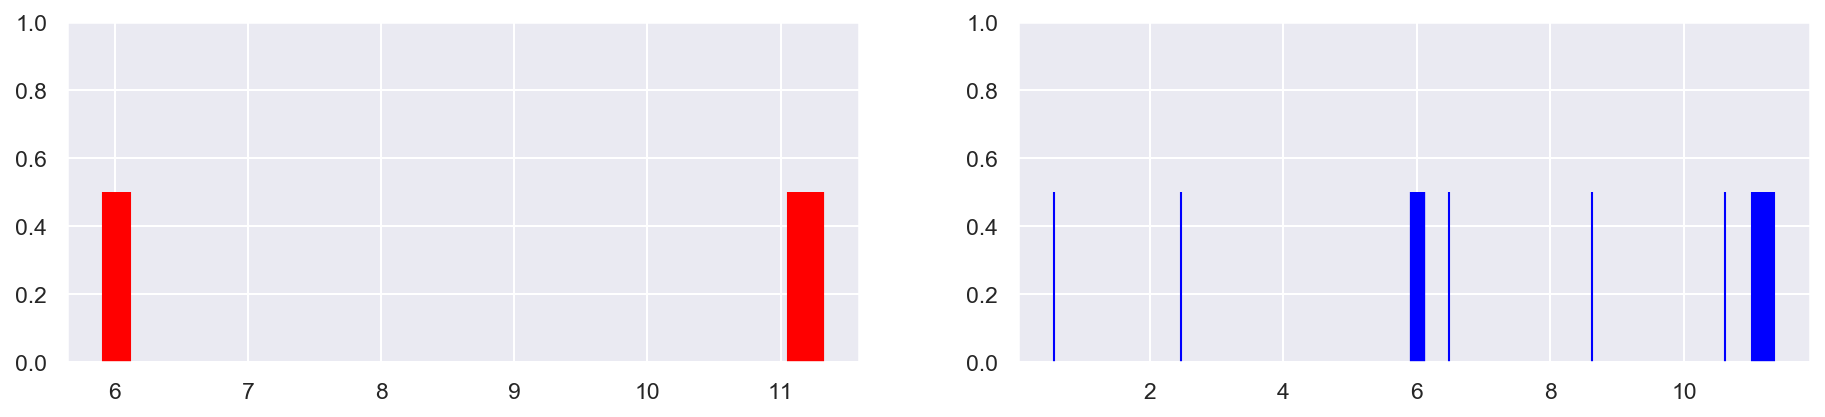

In [50]:
# Creating rugplots of both time difference data sets

fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

sns.rugplot(ffx_cleaned["dT(seconds)"], ax=axes3[0], height = 0.5, color='red')
sns.rugplot(ffx2_cleaned["dT(seconds)"], ax=axes3[1], height = 0.5, color='blue')

plt.savefig("rugplot1.png")

We clearly see there are (potentially) five outliers in our second dataset. 

**Question: Should any of these outliers be removed from the data set?**

**Answer:** First, here are some reasons I can think of that could explain their existence, to which I could possibly attribute them to a separate process:

* The webcam messed up somehow? (Not likely, since it continued to collect data points)
* They may have been fog at the same time as the lightning? (Is likely, but would have seen more outliers then)
* A PS4 notification popped up in the top left corner of the screen (software update)?


Looking at the first data set, we know that the "good data" should be clustered around ~6s and ~11s. We will conclude these outlier data points are truly bad data, and we will discard them.


In [51]:
# Finding the outlier values

condition1 = ffx2_cleaned["dT(seconds)"] > 6.2
condition2 = ffx2_cleaned["dT(seconds)"] < 11
condition3 = ffx2_cleaned["dT(seconds)"] < 4

outlier_df = ffx2_cleaned[( condition1 & condition2 ) | (condition3)]

In [52]:
outlier_df

,count,timings,Datetime,deltaT,dT(seconds)
901,902,2020-07-02 00:27:40.449227,2020-07-02 00:27:40.449227,00:00:10.618900,10.618900
902,903,2020-07-02 00:27:41.013529,2020-07-02 00:27:41.013529,00:00:00.564302,0.564302
903,904,2020-07-02 00:27:47.496821,2020-07-02 00:27:47.496821,00:00:06.483292,6.483292
978,979,2020-07-02 00:38:32.049087,2020-07-02 00:38:32.049087,00:00:08.622982,8.622982
979,980,2020-07-02 00:38:34.521496,2020-07-02 00:38:34.521496,00:00:02.472409,2.472409


In [53]:
# Removing rows from second data set corresponding to the outliers
ffx2_cleaned.shape
ffx2_cleaned.drop(labels=[902,979,903,978,901], axis=0, inplace=True)
ffx2_cleaned.shape

(1858, 5)

(1853, 5)

In [54]:
ffx2_cleaned

,count,timings,Datetime,deltaT,dT(seconds)
1,2,2020-07-01 22:18:49.157322,2020-07-01 22:18:49.157322,NaT,NaN
2,3,2020-07-01 22:18:55.197844,2020-07-01 22:18:55.197844,00:00:06.040522,6.040522
3,4,2020-07-01 22:19:06.378970,2020-07-01 22:19:06.378970,00:00:11.181126,11.181126
4,5,2020-07-01 22:19:12.418819,2020-07-01 22:19:12.418819,00:00:06.039849,6.039849
5,6,2020-07-01 22:19:23.520136,2020-07-01 22:19:23.520136,00:00:11.101317,11.101317
...,...,...,...,...,...
1854,1855,2020-07-02 02:43:49.553087,2020-07-02 02:43:49.553087,00:00:06.050874,6.050874
1855,1856,2020-07-02 02:44:00.693588,2020-07-02 02:44:00.693588,00:00:11.140501,11.140501
1856,1857,2020-07-02 02:44:06.734364,2020-07-02 02:44:06.734364,00:00:06.040776,6.040776
1857,1858,2020-07-02 02:44:17.871546,2020-07-02 02:44:17.871546,00:00:11.137182,11.137182


We can verify that the outliers were removed by redrawing the rugplots

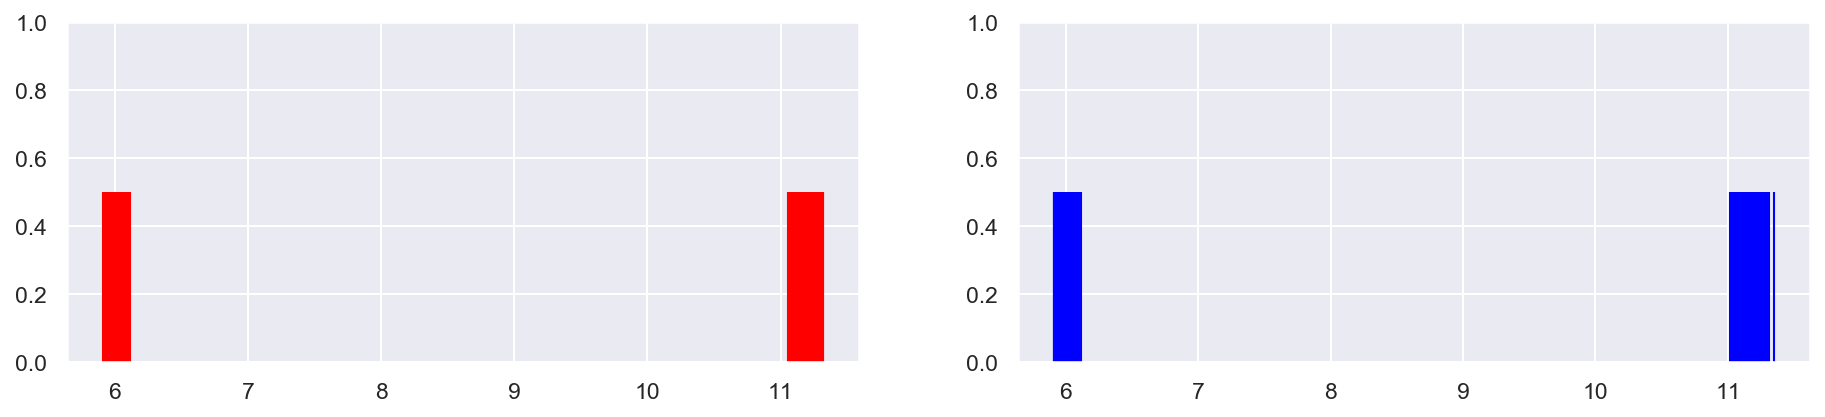

In [55]:
# Redrawing the two rugplots to see if outliers were indeed removed

fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(15,3))

sns.rugplot(ffx_cleaned["dT(seconds)"], ax=axes3[0], height = 0.5, color='red')
sns.rugplot(ffx2_cleaned["dT(seconds)"], ax=axes3[1], height = 0.5, color='blue')

plt.savefig("rugplot2.png")

Everything looks good! So we now continue on to looking at some basic summary statistics, just as we did for the original dataset above

In [56]:
ffx2_cleaned.describe()

,count,deltaT,dT(seconds)
count,1853.000000,1852,1852.000000
mean,930.491635,0 days 00:00:08.588570,8.588571
std,537.222896,0 days 00:00:02.581400,2.581401
min,2.000000,0 days 00:00:05.908757,5.908757
25%,465.000000,0 days 00:00:06.006245,6.006246
50%,931.000000,0 days 00:00:06.110337,6.110337
75%,1396.000000,0 days 00:00:11.169366,11.169366
max,1859.000000,0 days 00:00:11.352328,11.352328


In [57]:
# Using SciPy to do some basic statistical computations

var2 = stats.variation(ffx2_cleaned['dT(seconds)'][1:])
range2 = stats.iqr(ffx2_cleaned['dT(seconds)'][1:], rng=(0,100))
repeats2 = stats.find_repeats(ffx2_cleaned['dT(seconds)'][1:])

var2
range2
repeats2

0.3004811464565035

5.443571

RepeatedResults(values=array([ 5.988608,  6.000704,  6.000751,  6.004759,  6.033838,  6.038389,
       11.125527, 11.141499, 11.163883, 11.165584, 11.169405, 11.207062,
       11.227672, 11.249383]), counts=array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))

**Some basic summary statistics (second dataset):**

From the above information, we can see the values of the sample mean and sample standard deviation for the time differences are, respectively, $\sigma = 2.581401 \,s$ and $\mu = 8.588571 \,s$.

Using these, we can compute the coefficient of variation. This will help us to contextualize the sample standard deviation with respect to the sample mean:

$$C_V = \frac{\sigma}{\mu} = \frac{2.581401 \,s}{8.588571 \,s} =  0.3004811464565035 \approx 0.3$$

Since $C_V<1$, we infer that this time difference feature dataset is of low variance, meaning that the values are more closely clustered to the mean (i.e. there is minimal dispersion).

We can also compute the range of the time differences to be: $\max(dT) - \min(dT) = 5.443571\,s \approx 5.4 \,s$

Finally, we (very surprisingly!) see that there are **14** time difference values that are repeated! As before, each is repeated twice:


$5.988608\,s$ and $6.000704\,s$ and $6.000751\,s$ and $6.004759\,s$ and $6.033838\,s$ and $6.038389\,s$ and $11.125527\,s$ and $11.141499\,s$ and $11.163883\,s$ and $11.165584\,s$ and $11.169405\,s$ and $11.207062\,s$ and $11.227672\,s$ and $11.249383\,s$

**Data Visualization**

We will now take a look at some plots of the time difference data, and see if we can ascertain any more relationships or patterns in the data.

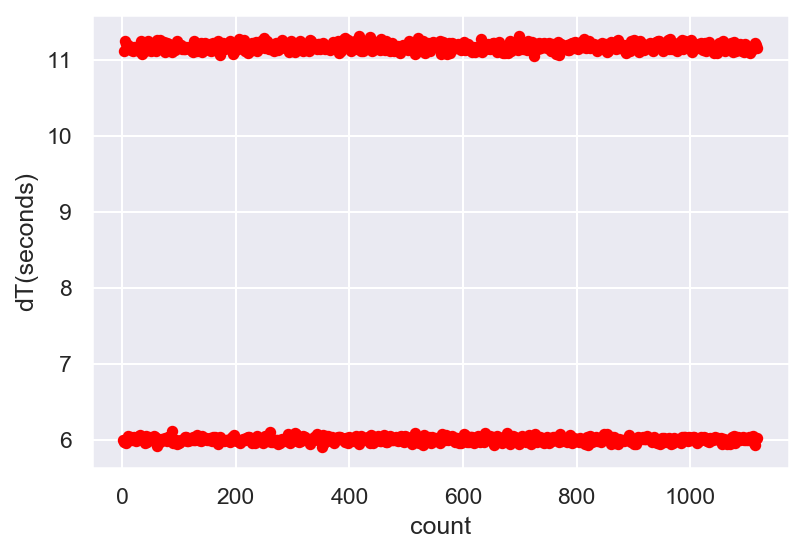

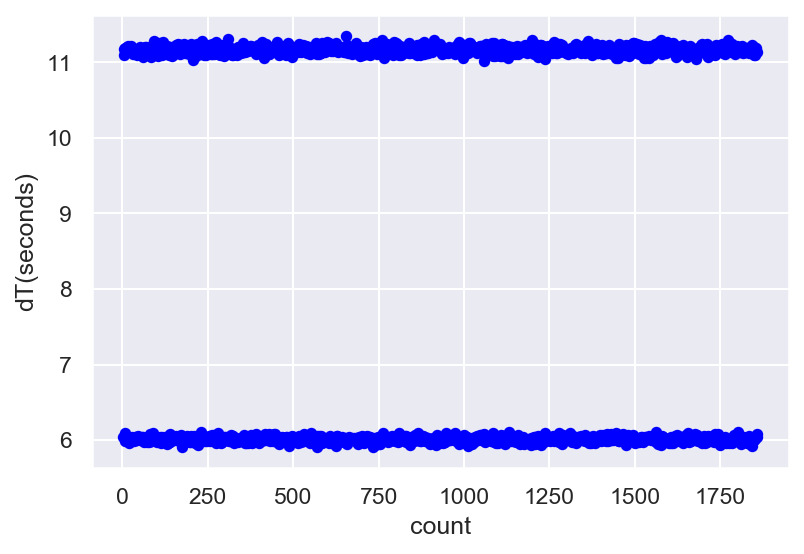

In [58]:
# A basic scatter plot

ffx_cleaned.plot.scatter(x="count", y="dT(seconds)", c="red")
plt.savefig("scatter1a.png", bbox_inches="tight")

ffx2_cleaned.plot.scatter(x="count", y="dT(seconds)", c="blue")
plt.savefig("scatter1b.png", bbox_inches="tight")

From even just these two basic scatter plots, we can confirm that **all** the time differences are approximately located at either 6 seconds or 11 seconds!

Let's isolate the 6-second (smaller) & 11-second (larger) values for each data set in their own plots:

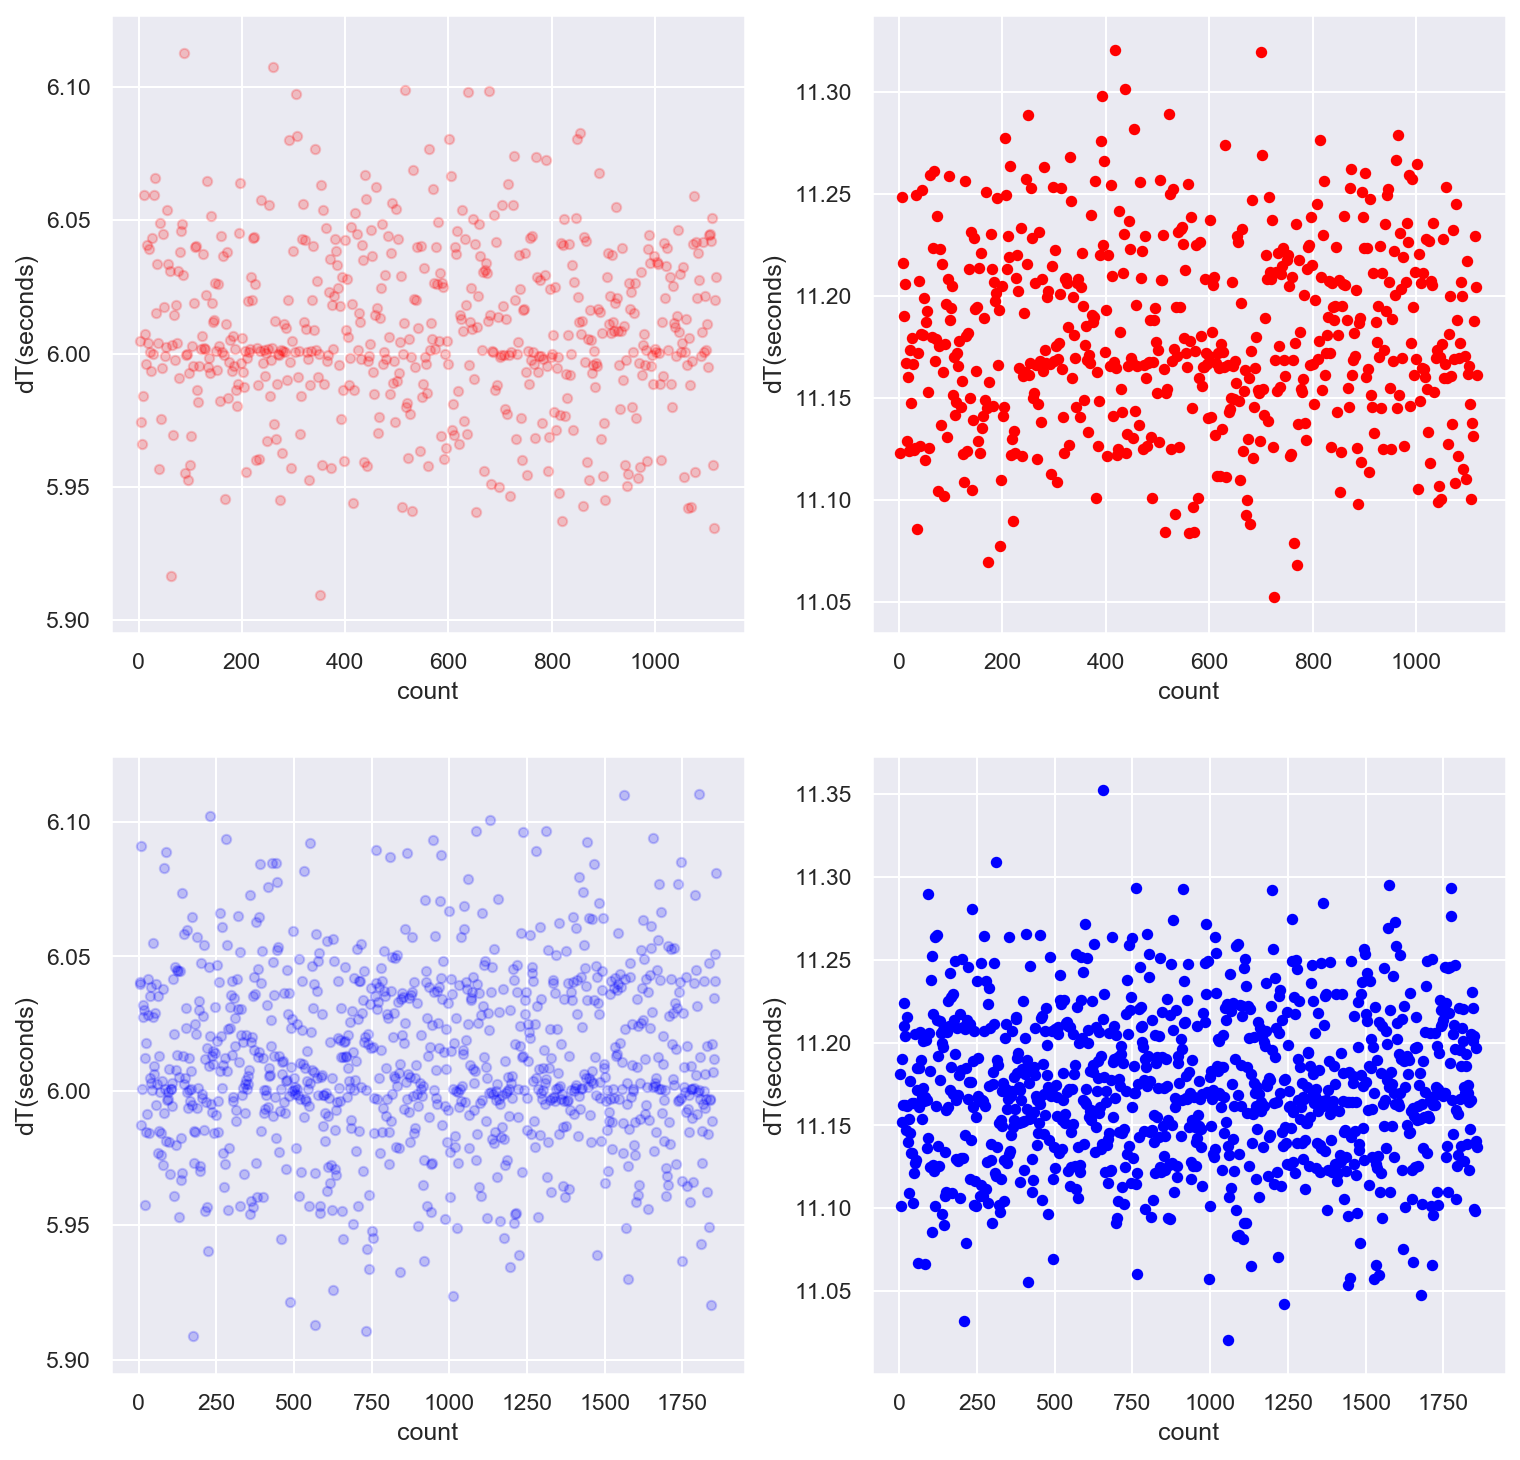

In [59]:
# Drawing four scatter plots; one for each dataset, and split for each of the smaller & larger time difference values
    # The darker points are for the larger data points; the lighter points are for the smaller
    # The red plots for the FIRST dataset; the blue plots for the SECOND

# Setting up plot framework
fig4, axes4 = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Conditions specifying FIRST dataset
condition1S = ffx_cleaned['dT(seconds)']<8
condition1L = ffx_cleaned['dT(seconds)']>8

# Conditions specifying SECOND dataset
condition2S = ffx2_cleaned['dT(seconds)']<8
condition2L = ffx2_cleaned['dT(seconds)']>8

# Plots for FIRST dataset
ffx_cleaned[condition1S].plot.scatter(x="count" , y="dT(seconds)" , c=[(1,0,0,0.2)], ax=axes4[0,0])
ffx_cleaned[condition1L].plot.scatter(x="count" , y="dT(seconds)" , c=[(1,0,0,1)], ax=axes4[0,1])

# Plots for SECOND dataset
ffx2_cleaned[condition2S].plot.scatter(x="count" , y="dT(seconds)" , c=[(0,0,1,0.2)], ax=axes4[1,0])
ffx2_cleaned[condition2L].plot.scatter(x="count" , y="dT(seconds)" , c=[(0,0,1,1)], ax=axes4[1,1])

plt.savefig("scatter2.png", bbox_inches="tight")


We can't really infer much information from any of these scatter plots. But, we can see the dispersion of each dataset, namely around $0.10\,s$ for the smaller values, and around $0.15\,s$ for the larger values.

To better visualize these data, we can use a standard histogram. We will first plot both datasets with their smaller and larger values together, and subsequently plot each dataset split into their lower and higher values.

Text(0.5, 1.0, 'First Dataset')

Text(0.5, 1.0, 'Second Dataset')

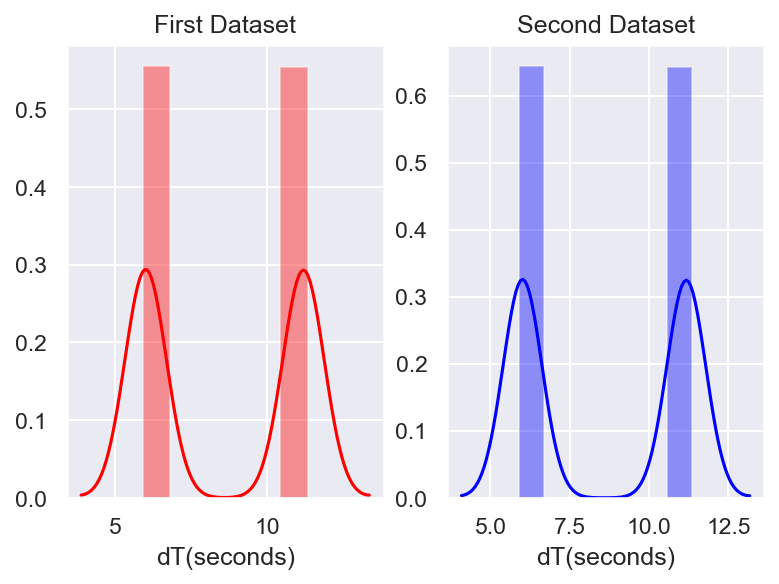

In [60]:
# Drawing histograms for each dataset (NO SPLIT)

# Configuring the plot framework
fig, axes = plt.subplots(nrows=1, ncols=2)

# Plotting the time difference data
sns.distplot(ffx_cleaned["dT(seconds)"], ax=axes[0], color='red')
sns.distplot(ffx2_cleaned["dT(seconds)"], ax=axes[1], color='blue')

# Setting plot titles
axes[0].set_title("First Dataset")
axes[1].set_title("Second Dataset")

plt.savefig("histogram1.png", bbox_inches="tight")

As expected, we see that both our datasets exhibit a bi-modal distribution. Even more so, the data points seem to be roughly equally distributed between the two modes. This strongly supports our initial observation of the lightning strike timing alternating between 6 & 11 seconds.

Let's isolate the data around each mode i.e. split each dataset into it's smaller and larger values. To make our plotting easier, we first extract the time difference data into their own seperate dataframes.

In [61]:
# Extracting time difference data from each dataset into their own dataframes

data1 = ffx_cleaned[["count", "dT(seconds)"]]
data2 = ffx2_cleaned[["count", "dT(seconds)"]]

# Just a fancy way to view multiple dataframes horizontally instead of vertically
df1_styler = data1.head().style.set_table_attributes("style='display:inline'").set_caption('First Dataset')
df2_styler = data2.head().style.set_table_attributes("style='display:inline'").set_caption('Second Dataset')

display_html(df1_styler._repr_html_()+" .....  "+df2_styler._repr_html_(), raw=True)

,count,dT(seconds)
0,1,nan
1,2,6.004774
2,3,11.123151
3,4,5.974197
4,5,11.248352
,count,dT(seconds)
1,2,nan
2,3,6.040522
3,4,11.181126
4,5,6.039849


In [62]:
# From the above dataframes, we extract the smaller and larger values into separate dataframes as well

# Smaller and larger values for FIRST dataset
data1_smaller = data1[data1["dT(seconds)"]<8]
data1_larger = data1[data1["dT(seconds)"]>8]

# Smaller and larger values for SECOND dataset
data2_smaller = data2[data2["dT(seconds)"]<8]
data2_larger = data2[data2["dT(seconds)"]>8]

# Again, just being fancy to view all four dataframes side-by-side
data1_small_styler = data1_smaller.head().style.set_table_attributes("style='display:inline'").set_caption('First Dataset - Small')
data1_large_styler = data1_larger.head().style.set_table_attributes("style='display:inline'").set_caption('First Dataset - Large')
data2_small_styler = data2_smaller.head().style.set_table_attributes("style='display:inline'").set_caption('Second Dataset - Small')
data2_large_styler = data2_larger.head().style.set_table_attributes("style='display:inline'").set_caption('Second Dataset - Large')

display_html(data1_small_styler._repr_html_()+" .....  "+data1_large_styler._repr_html_()+" .....  "+data2_small_styler._repr_html_()+" .....  "+data2_large_styler._repr_html_(), raw=True)

,count,dT(seconds)
1,2,6.004774
3,4,5.974197
5,6,5.966099
7,8,5.983968
9,10,6.059533
,count,dT(seconds)
2,3,11.123151
4,5,11.248352
6,7,11.216055
8,9,11.190219


We can create box-and-whisker plots to see the quartiles.

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 0, '')

Text(0.5, 1.0, 'First Dataset - Small')

Text(0.5, 1.0, 'First Dataset - Large')

Text(0.5, 1.0, 'Second Dataset - Small')

Text(0.5, 1.0, 'Second Dataset - Large')

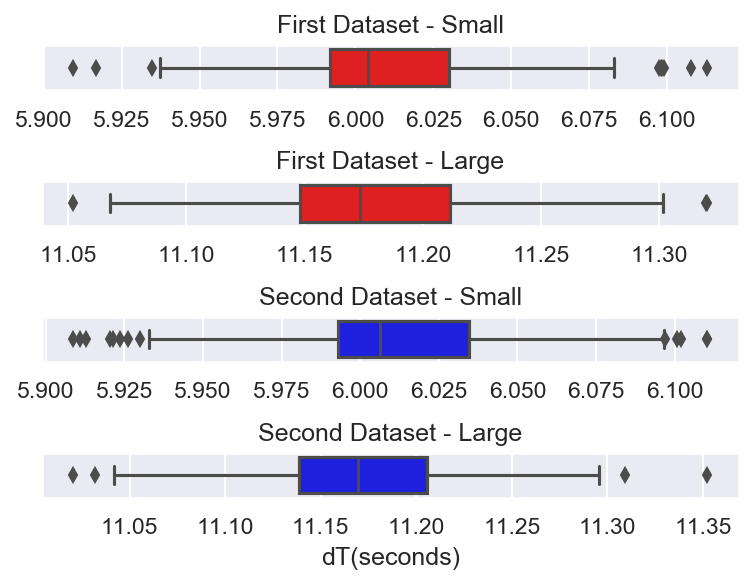

In [63]:
# Drawing box-and-whisker plots, in order to visualize the quartiles


# Configuring the plot framework
fig5, axes5 = plt.subplots(nrows=4, ncols=1)
plt.subplots_adjust(hspace = 2)

# Plotting the FIRST dataset
sns.boxplot(x=data1_smaller['dT(seconds)'], ax=axes5[0], color='red')
sns.boxplot(x=data1_larger['dT(seconds)'], ax=axes5[1], color='red')

# Plotting the SECOND dataset
sns.boxplot(x=data2_smaller['dT(seconds)'], ax=axes5[2], color='blue')
sns.boxplot(x=data2_larger['dT(seconds)'], ax=axes5[3], color='blue')

# Turning off x-axis labels
axes5[0].set_xlabel("")
axes5[1].set_xlabel("")
axes5[2].set_xlabel("")

# Setting plot titles
axes5[0].set_title("First Dataset - Small")
axes5[1].set_title("First Dataset - Large")
axes5[2].set_title("Second Dataset - Small")
axes5[3].set_title("Second Dataset - Large")

plt.savefig("boxwhisker1.png", bbox_inches="tight")

We draw histograms for each dataset, split into smaller and larger values.

(5.85, 6.15)

(5.85, 6.15)

(11.0, 11.4)

(11.0, 11.4)

Text(0.5, 1.0, 'First Dataset - Small')

Text(0.5, 1.0, 'First Dataset - Large')

Text(0.5, 1.0, 'Second Dataset - Small')

Text(0.5, 1.0, 'Second Dataset - Large')

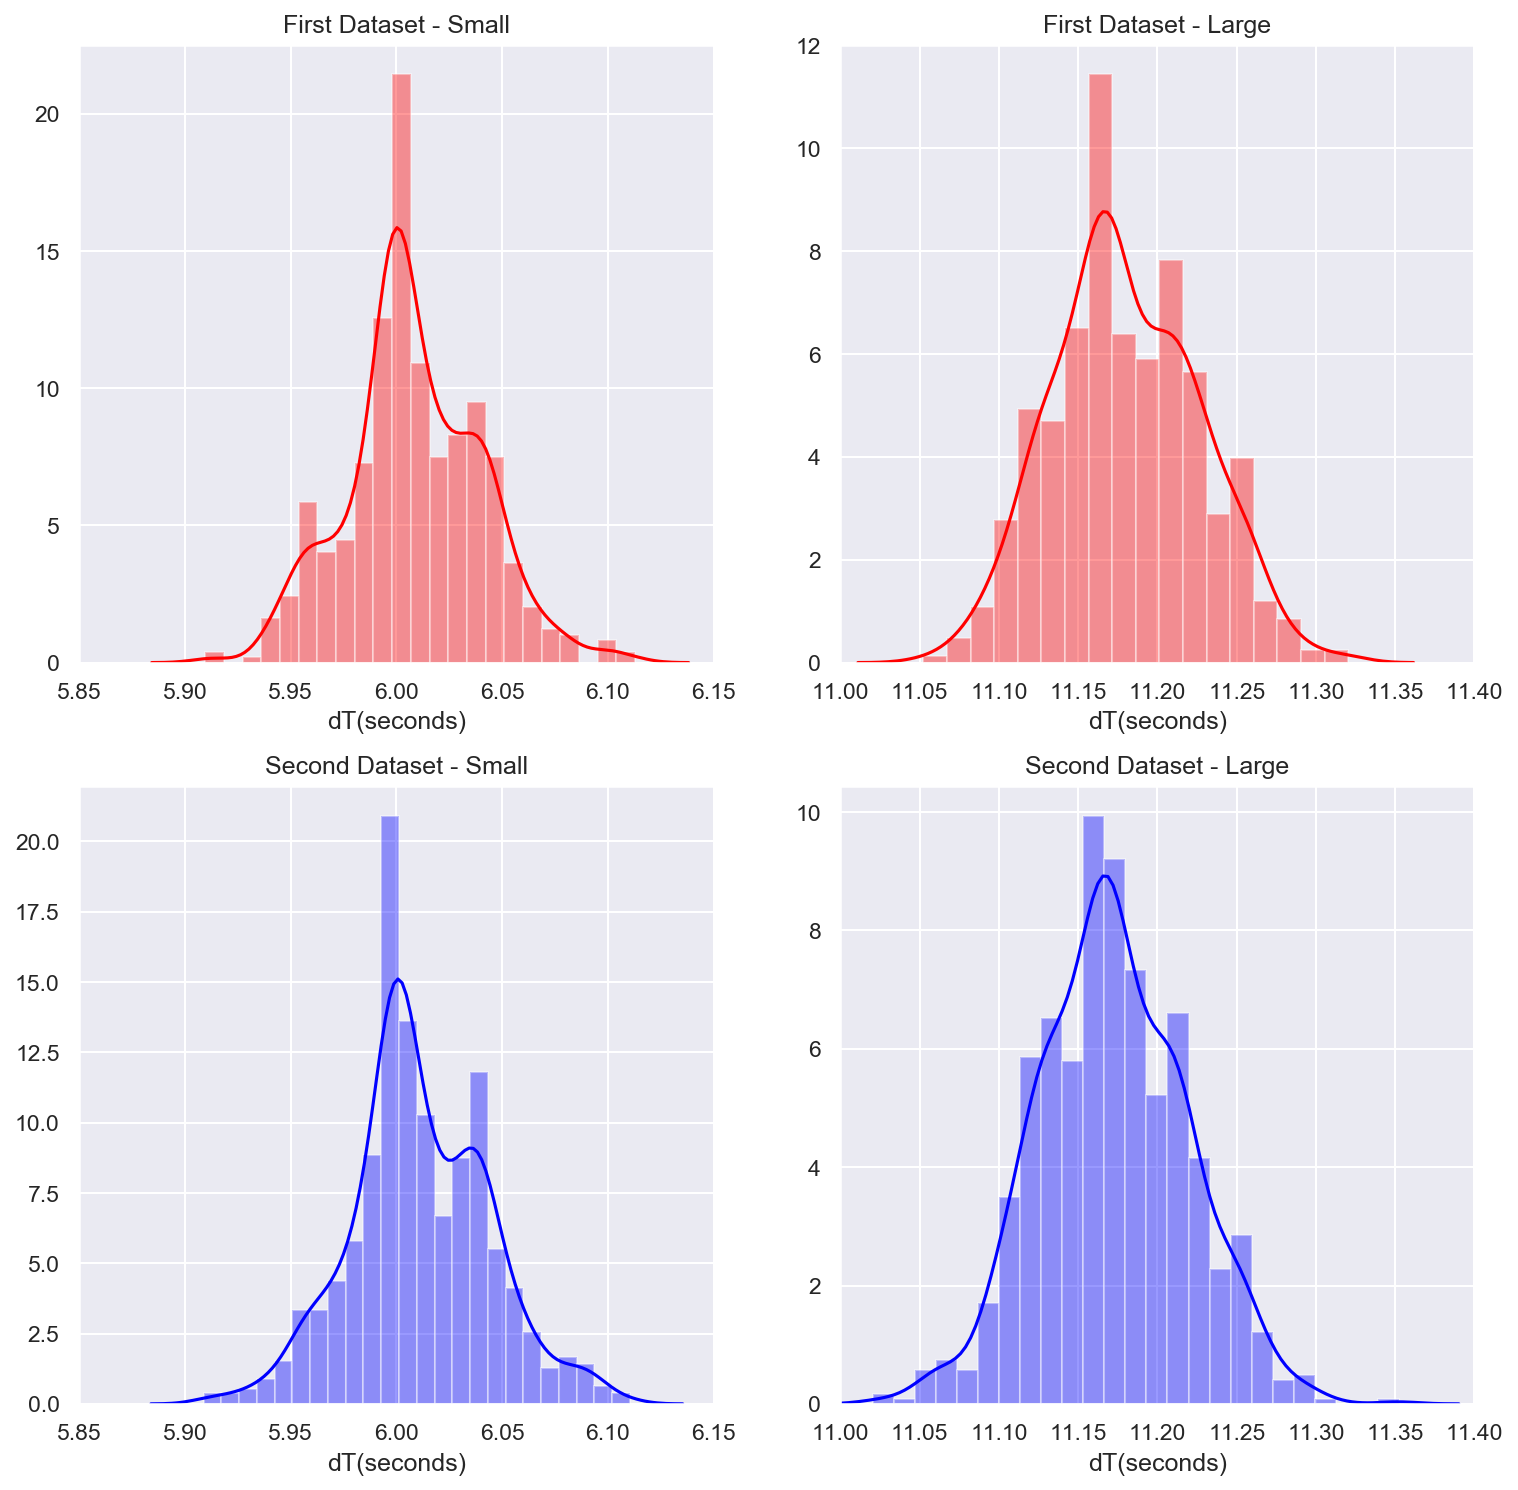

In [64]:
# Drawing histograms for each dataset (WITH SPLIT)

# Configuring plot framework
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

# Plotting FIRST dataset
sns.distplot(data1_smaller["dT(seconds)"], ax=axes2[0,0], color='red')
sns.distplot(data1_larger["dT(seconds)"], ax=axes2[0,1], color='red')

# Plotting SECOND dataset
sns.distplot(data2_smaller["dT(seconds)"], ax=axes2[1,0], color='blue')
sns.distplot(data2_larger["dT(seconds)"], ax=axes2[1,1], color='blue')

# Standardizing domains for smaller-value plots
axes2[0,0].set_xlim([5.85,6.15])
axes2[1,0].set_xlim([5.85,6.15])

# Standardizing domains for larger-value plots
axes2[0,1].set_xlim([11.00,11.40])
axes2[1,1].set_xlim([11.00,11.40])

# Specifiying plot titles
axes2[0,0].set_title("First Dataset - Small")
axes2[0,1].set_title("First Dataset - Large")
axes2[1,0].set_title("Second Dataset - Small")
axes2[1,1].set_title("Second Dataset - Large")

plt.savefig("histogram2.png", bbox_inches="tight")

Looking at these plots, we can infer that the underlying distribution for each dataset's smaller & larger values is a normal distribution! Let's get the mean and standard deviation:

In [65]:
# Computing some basic summary statistics for the split datasets

mean1_small = np.mean(data1_smaller["dT(seconds)"])
std1_small = np.std(data1_smaller["dT(seconds)"])

mean1_large = np.mean(data1_larger["dT(seconds)"])
std1_large = np.std(data1_larger["dT(seconds)"])

mean2_small = np.mean(data2_smaller["dT(seconds)"])
std2_small = np.std(data2_smaller["dT(seconds)"])

mean2_large = np.mean(data2_larger["dT(seconds)"])
std2_large = np.std(data2_larger["dT(seconds)"])

# Organizing statistics into a dictionary
split_statistics = { 'data1_small':(mean1_small,std1_small),
                     'data1_large':(mean1_large,std1_large),
                     'data2_small':(mean2_small,std2_small),
                     'data2_large':(mean2_large,std2_large)  }

print("(mean, std):")
split_statistics

(mean, std):


{'data1_small': (6.00842131484794, 0.03166719025701297),
 'data1_large': (11.180059645161284, 0.045959886334316996),
 'data2_small': (6.010966267529663, 0.032635524607146436),
 'data2_large': (11.171748859459445, 0.046645752136388954)}

|  || First Dataset || Second Dataset |
--- | --- | --- | --- | ---
|| Mean | Std. | Mean | Std. |
| Small | 6.008 | 0.0317 | 6.011 | 0.0326 |
| Large | 11.180 | 0.0460 | 11.172 | 0.0466 |


We can see that the **standard deviations for all datasets are very small**, meaning that the time differences are very closely centered about their respective means. We can further support our claim by computing the coefficient of variance for each of these four datasets:

In [66]:
# Computing coefficients of variance for each split smaller and larger datasets

cov1_small = split_statistics['data1_small'][1]/split_statistics['data1_small'][0]
cov1_large = split_statistics['data1_large'][1]/split_statistics['data1_large'][0]
cov2_small = split_statistics['data2_small'][1]/split_statistics['data2_small'][0]
cov2_large = split_statistics['data2_large'][1]/split_statistics['data2_large'][0]

# cov1_small
# cov1_large
# cov2_small
# cov2_large

Indeed, we observe all coefficients of variance to be very small, as seen in the table below:

| CoV | First Dataset | Second Dataset |
--- | --- | ---
| Small | 0.005270 | 0.005429 |
| Large | 0.004111 | 0.004175 | 

**Investigating Alternating Patterns**

Our final analysis will look into the alternating behaviour of the time differences (in original, non-split datasets). We can determine if the data is actually alternating through a few avenues:

1. Simply check if the corresponding counts for the smaller & larger values are each attributed to either even or odd dataframe indices. The sequence is alternating if all even/odd dataframe indices are only attributed to either small or larger values.

2. Assign +1 and -1 to higher and lower values, respectively, and keep track of a running total of these units. The final total should be 0 if the number sequence is alternating.

In [67]:
# This function is no good anymore!!!
# It won't work for the newer data, because I removed the outliers

# def all_even_or_odd(array):

#     remainders = list(map(lambda x: x % 2, array))
    
#     if remainders.count(1) == len(array):
#         return "The array contains all odd integers"
#     elif remainders.count(0) == len(array):
#         return "The array contains all even integers"
#     else:
#         return "The array contains both even and odd integers"

In [68]:
# Function to determine if time differences are alternating between smaller and larger values

def check_alternating(array, mid):
    """To check whether a sequence of real numbers
    exhibits an alternating pattern, about some
    specified number."""
    
    num = 0
    for count, time_diff in enumerate(array):
        if (time_diff > mid):
            num+=1
        else:
            num-=1
        
        if (num == 2 or num == -2):
            return f"There is some point where the array is not alternating; see count {count}"
    
    return "The array is alternating!"

In [69]:
# Check if the time difference values in the FIRST data set are alternating

check_alternating(ffx_cleaned["dT(seconds)"].values[1:], mid=8)

'The array is alternating!'

In [70]:
# Check if the time difference values in the SECOND data set are alternating

check_alternating(ffx2_cleaned["dT(seconds)"].values[1:], mid=8)

'There is some point where the array is not alternating; see count 973'

This is definitely an unexpected result! Let's look at the place where the dataset is not alternating, at a count of 973:

In [71]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
ffx2_cleaned["dT(seconds)"][960:980]

964    11.149384
965     6.016088
966    11.165993
967     6.038756
968    11.136813
969     6.070795
970    11.148043
971     6.041960
972    11.113243
973     6.087841
974    11.168942
975     6.034034
976    11.217873
977     5.987260
980     6.048158
981    11.248197
982     6.014345
983    11.212291
984     5.952413
985    11.271519
Name: dT(seconds), dtype: float64

As predicted by our function, we see that the time differences for the second dataset go from $5.987260\,s$ to $6.048158\,s$, with respective counts of 977 and 980.

This in fact has an easy explanation: The data for counts 978 & 979 were removed as we had deemed them to be outliers. This is what breaks our alternating pattern, without an alternating value of approximately 11 seconds in between. The values that were taken out where $8.622982 \,s$ & $2.472409 \,s$, respectively. 

Given our very large data sets, it is very reasonable to assume that if these (or any) outliers did not exist, this sequence of time differences would still be alternating.

Thus, we can conclude that the time differences between lightning strikes are indeed alternating!

**Thus, we have finished our exploratory data analysis of the lightning strike data! For further research, we will consider doing an entirely separate data analysis for the grayscale data in another Jupyter Notebook. See you there!**